### A short DataCamp project for [Clustering Antarctic Penguin Species](https://app.datacamp.com/learn/projects/1809)

The dataset is available in the data folder as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

<i>Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  The task is to help them identify groups in the dataset.<i>

### Import Required Packages

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

### Load the dataset

In [195]:
# Create list for the species mentioned
species = ["Adelie", "Chinstrap", "Gentoo"]

# Load Dataset
penguins_df = pd.read_csv("../data/penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [196]:
penguins_df.shape

(332, 5)

In [197]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


## Data Preprocessing

In [198]:
# Check for missing values
penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [199]:
# Encode labels for 'sex' column
encoder = LabelEncoder()
penguins_df['sex'] = encoder.fit_transform(penguins_df['sex'])
penguins_df['sex']

0      1
1      0
2      0
3      0
4      1
      ..
327    0
328    0
329    1
330    0
331    1
Name: sex, Length: 332, dtype: int64

In [200]:
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(penguins_df[numeric_columns])

# Convert back to DataFrame and keep original column names
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns)

### Perform Elbow analysis to determine the optimal number of clusters

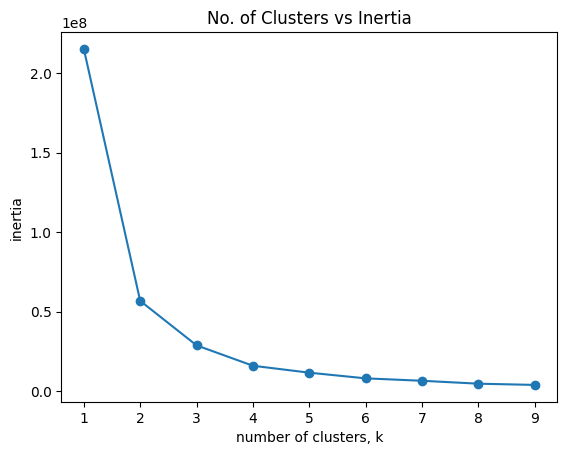

In [201]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(penguins_df)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.title("No. of Clusters vs Inertia")
plt.show()


The **elbow point** here is where `k = 4`. This is where the rate of decrease in inertia slows down significantly. This point indicates the optimal number of clusters because adding more clusters beyond this point yields diminishing returns in terms of reducing inertia.

### Running KMeans with the chosen n_clusters

In [202]:
kmeans = KMeans(n_clusters=4, random_state=42)

kmeans.fit(penguins_df)

# Get cluster labels
labels = kmeans.labels_


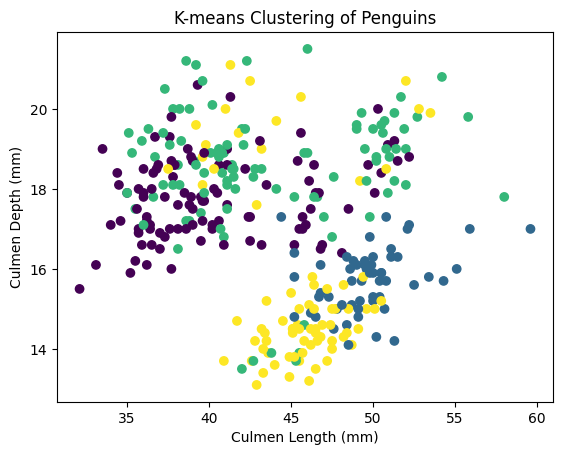

In [203]:
# Scatter plot using two features and coloring by cluster labels
plt.scatter(penguins_df['culmen_length_mm'], penguins_df['culmen_depth_mm'], c=labels, cmap='viridis')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('K-means Clustering of Penguins')
plt.show()

### Dimensionality Reduction using PCA

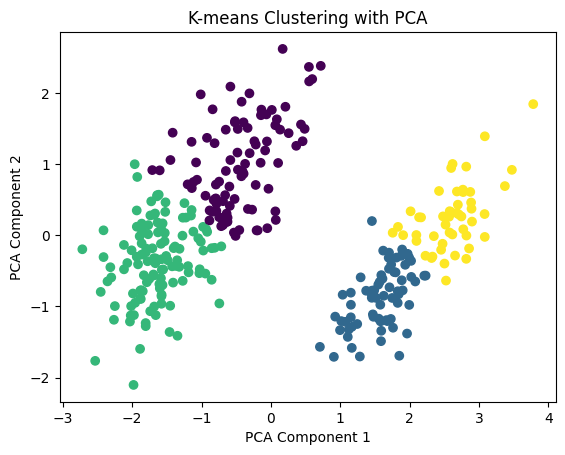

[0.68713344 0.19641564]


In [204]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(pca_data)
labels = kmeans.labels_

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering with PCA')
plt.show()
print(pca.explained_variance_ratio_)


In [205]:
# Get PCA components and their contribution to the principal components
components = pd.DataFrame(pca.components_, columns=numeric_columns)
print(components)

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0          0.453174        -0.398518           0.576880     0.550478
1          0.604990         0.792959           0.003798     0.072032


Higher absolute values indicate that the feature contributes more to that principal component.

`flipper_length_mm` and `body_mass_g` have higher contributions in PC1, while `culmen_length_mm` and `culmen_depth_mm` have higher contributions in PC2.

In [206]:
# Add PCA components to df for analysis
penguins_df['PCA1'] = pca_data[:, 0]
penguins_df['PCA2'] = pca_data[:, 1]

# Add cluster labels to the df
penguins_df['label'] = labels

# Profile the clusters
stat_penguins = penguins_df.groupby('label')[numeric_columns].mean()
print(stat_penguins)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
label                                                                   
0             46.913043        18.881522         197.119565  3951.358696
1             45.608696        14.434783         213.347826  4758.333333
2             38.333884        17.959504         187.917355  3529.132231
3             50.272000        15.772000         222.600000  5553.500000


In [207]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_avg = silhouette_score(pca_data, labels)
davies_bouldin = davies_bouldin_score(pca_data, labels)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin}')

Silhouette Score: 0.5040546275973788
Davies-Bouldin Index: 0.6839314622846173


<Figure size 500x600 with 0 Axes>

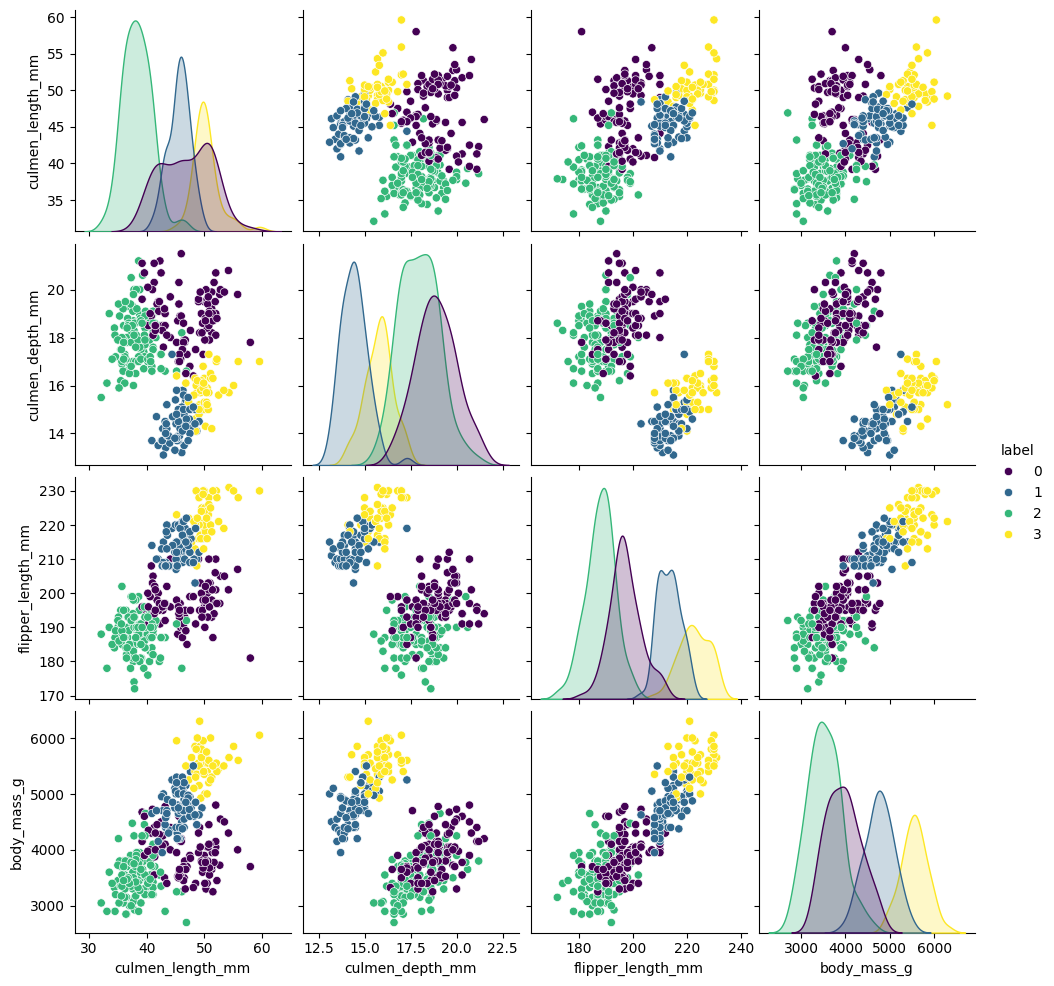

In [211]:
sns.pairplot(penguins_df, vars=numeric_columns, hue='label', palette='viridis')
plt.show()